In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [4]:
REBUILD_DATA = True

class RigidVSNonrigid():
    IMG_SIZE=28
    RIGID = "AlexisImages/Rigid"
    NONRIGID = "AlexisImages/NonRigid"
    LABELS = {RIGID: 0, NONRIGID: 1}
    
    training_data = []
    rigidcount = 0
    nonrigidcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                    if label == self.RIGID:
                        self.rigidcount += 1
                    elif label == self.NONRIGID:
                        self.nonrigidcount += 1
                    else:
                        print(label)
                        print(self.RIGID)
                        print(self.NONRIGID)
                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("alexis_training_data.npy",self.training_data)
        print("Rigid:",self.rigidcount)
        print("Nonrigid:",self.nonrigidcount)

        
if REBUILD_DATA:
    rigidvnonrigid = RigidVSNonrigid()
    rigidvnonrigid.make_training_data()
                    

 31%|██████████████████████████▎                                                          | 31/100 [00:00<00:00, 309.82it/s]

AlexisImages/Rigid


 58%|█████████████████████████████████████████████████▎                                   | 58/100 [00:00<00:00, 283.43it/s]

AlexisImages/NonRigid


100%|████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.85it/s]

Rigid: 100
Nonrigid: 100



C:\Users\gunne\anaconda3\envs\cs791\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [5]:
training_data = np.load("alexis_training_data.npy",allow_pickle=True)

In [6]:
print(len(training_data))

200


In [7]:
print(training_data[0])

[array([[  0,   0,   1,   1,   0,   0,   0,   0,   1,   0,   7,   0,  42,
         66, 155, 160,  54,  95, 112, 102,  65,   0,   8,   0,   8,   5,
         19, 104],
       [ 88,  91, 118,   0,   0,  12,   0,   0,   0,   0,  29,  48,  93,
        153, 166, 127,  84,  50,  82,  60,  57,  30,  12,   9,   0, 102,
         13,   0],
       [ 88, 109, 143,   5,   0,   0, 109,   4,   3,  55,  78,  87, 120,
        171,  91, 122, 125,  96,  74,  93, 109,  49,  77,   6, 107,  42,
          0,  25],
       [ 90,   1,   0,  15,   0,  76,  51,   0,   7,   0,  11,  64,  88,
        180,  95, 145, 167,  86,  85,  68,  81,  65,  93,  64,  70,  61,
          8,   0],
       [  0,   1,   8,   0,  38,  93,  36,   0,   0,  18,   7,  12,  52,
         95,   0, 117, 187,  82,  73,  82,  89,  57,  90,  98, 113,   0,
          7,   0],
       [ 21,   8,   0, 100,  90,  69,  15,   7,  14,   0,   0,   0,  58,
         86,   2,  15, 120,  37,   0,  90, 115,  55, 108, 116,  75,  86,
        101,   0],
       [ 

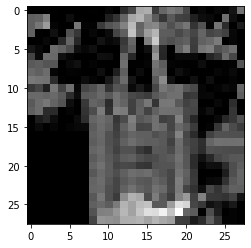

In [8]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0],cmap="gray")
plt.show()